# Loss Functions

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## MSE

## Binary Cross-entropy

* [Good article](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a)

Generally used if you are training *binary classifier* (i.e. you have two classes, $a$ and $b$ and you want to know 

$P(a | X) = 1 - P(b | X)$

To make the notation a bit easier we will call the classes we are trying to predict, $y_i \in (0, 1)$ and define $P(y_i) = P(y_i == 1)$.

How can we evaluate our predictions? For a single element a pretty simple score function might be,

$P(y_i) y_i + (1 - P(y_i)) (1 - y_i)$

which is: 1 if we predict with $P = 1$ the correct class, 0 if we predict with $P = 1$ the wrong class, 0.5 if we predict with $P = 0.5$ (either class). Basically we score the the amount of probability we put on the correct class.

This is a reasonable first stab - maximizing this score (summing over $y_i$) certainly wouldn't lead to the worst outcome. However, we should penalize horrendous errors more harshly - it is much worse to make one error where we had $P = 1$ than two errors where we have $P = 0.75$ whereas this model scores those equally.

Binary cross entropy uses the *log* of the probailities to penalize large errors. It also (being a loss function, rather than a score function) takes the negative. Rather than maximizing the score, we minimize the loss. Finally we average this across all elements.

$\rm{L_{BCE}} = -\frac{1}{N} \sum \big(\log(P(y_i)) y_i + \log((1 - P(y_i))) (1 - y_i)\big)$

The plot below shows how the loss increases rapidly when we make a large error (very low probability assigned to the correct class).

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Probability assigned to correct class')]

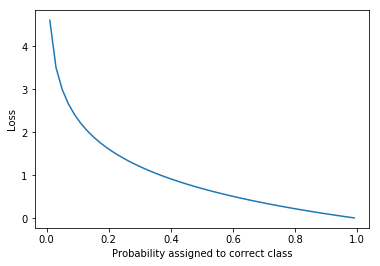

In [8]:
def bce(prob_is_1, truth):
    return -(np.log(prob_is_1) * truth + np.log(1 - prob_is_1) * (1 - truth))

x = np.linspace(0.01, 0.99, num=50)
cost = bce(x, 1)

_, ax = plt.subplots()
ax.plot(x, cost)
ax.set(xlabel="Probability assigned to correct class", ylabel="Loss")

This intuitively makes some sense but so would many other similar loss functions. Why is this right?

We are trying to come up with some $P(y_i | X)$ that minimizes loss, but we know that the data is generated by some intrinsic $Q(y_i | X)$. Exactly what form this function takes we have no idea, but it is there somewhere... We want to have our $P$ be as close to $Q$ as we can get.

This (as we know from [variational inference](../variational_inference/main.ipynb)) is what the KL divergence measures!

$$
D_{KL}(P || Q) = \sum_{y \in X} P(y) \log \big(\frac{P(y)}{Q(y)}\big)
$$

Thus the contribution of each element to the KL divergence is (remembering our log laws!),

$P(y_i) ( \log(P(y_i)) - \log(Q(y_i)) )$